# Modelos Computacionales II
## Proyecto Final
### Claudia Coutiño V.

**Dataset**: Imgs en S06_proyecto

**Objetivo**: Qué me puedes decir del dataset?

El proyecto debe desarrollar las habilidades aprendidas a lo largo del semestre:

1. **Análisis de dataset (AED)**
2. **Identificación del tipo de problema** (clasificación o regresión)
3. **Creación de propuestas de modelos** (qué modelos supervisados utilizar, cómo crear la ANN o CNN a utilizar)
4. **Evaluación de resultados** acorde al problema:
   - Clasificación: accuracy, precision, recall, F1
   - Regresión: MSE, RMSE, R²
5. **Análisis de resultados** (determinar el mejor resultado posible y justificar)
6. **Interpretabilidad** de los resultados

# Análisis Exploratorio de Datos (AED)

In [2]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [3]:
# Paqueterías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [4]:
# Ruta del dataset
base_path = "C:/Users/clau/Desktop/Repo-2025/Neurociencias-2025-2/S06_proyecto/dataset"

# Verificar que la ruta exista
if not os.path.exists(base_path):
    raise FileNotFoundError(f"La ruta no existe: {base_path}")

# Explorar carpetas
def count_images(subfolder, classes):
    counts = {}
    for class_name in classes:
        path = os.path.join(base_path, subfolder, class_name)
        if not os.path.exists(path):
            print(f"¡Advertencia! Carpeta no encontrada: {path}")
            counts[class_name] = 0
        else:
            counts[class_name] = len(os.listdir(path))
    return counts

classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Listar primeros 5 archivos de glioma en Training
sample_path = os.path.join(base_path, "Training", "glioma")
print("Ej. de Archivos:", os.listdir(sample_path)[:5])

Ej. de Archivos: ['Tr-glTr_0000.jpg', 'Tr-glTr_0001.jpg', 'Tr-glTr_0002.jpg', 'Tr-glTr_0003.jpg', 'Tr-glTr_0004.jpg']


In [5]:
# Contar en Training y Testing
train_counts = count_images('Training', classes)
test_counts = count_images('Testing', classes)

print("\nTraining counts:", train_counts)
print("Testing counts:", test_counts)


Training counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Testing counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


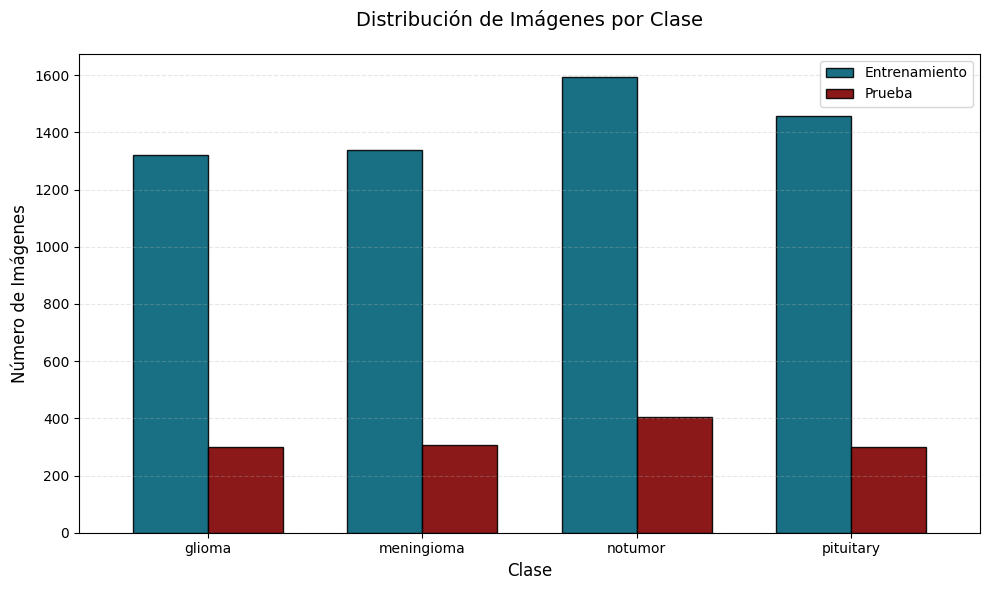

In [83]:
# Visualizar con Gráfica de Barras
df_train = pd.DataFrame(train_counts.items(), columns=['Class', 'Train']) # Train
df_test = pd.DataFrame(test_counts.items(), columns=['Class', 'Test']) # Test
df = pd.merge(df_train, df_test, on='Class') # Crear DataFrame

# Graficar
colors = ['#006078', '#800000']
ax = df.plot(
    x='Class',
    y=['Train', 'Test'],
    kind='bar',
    figsize=(10, 6),
    color=colors,
    edgecolor='black',  # Borde negro para mejor contraste
    width=0.7,         # Ancho de las barras
    alpha=0.9          # Transparencia sutil
)
plt.title('Distribución de Imágenes por Clase', fontsize=14, pad=20)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Número de Imágenes', fontsize=12)
plt.xticks(rotation=0)  # Etiquetas horizontales

plt.legend(['Entrenamiento', 'Prueba'], frameon=True, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout() # Ajustar márgenes
plt.show()

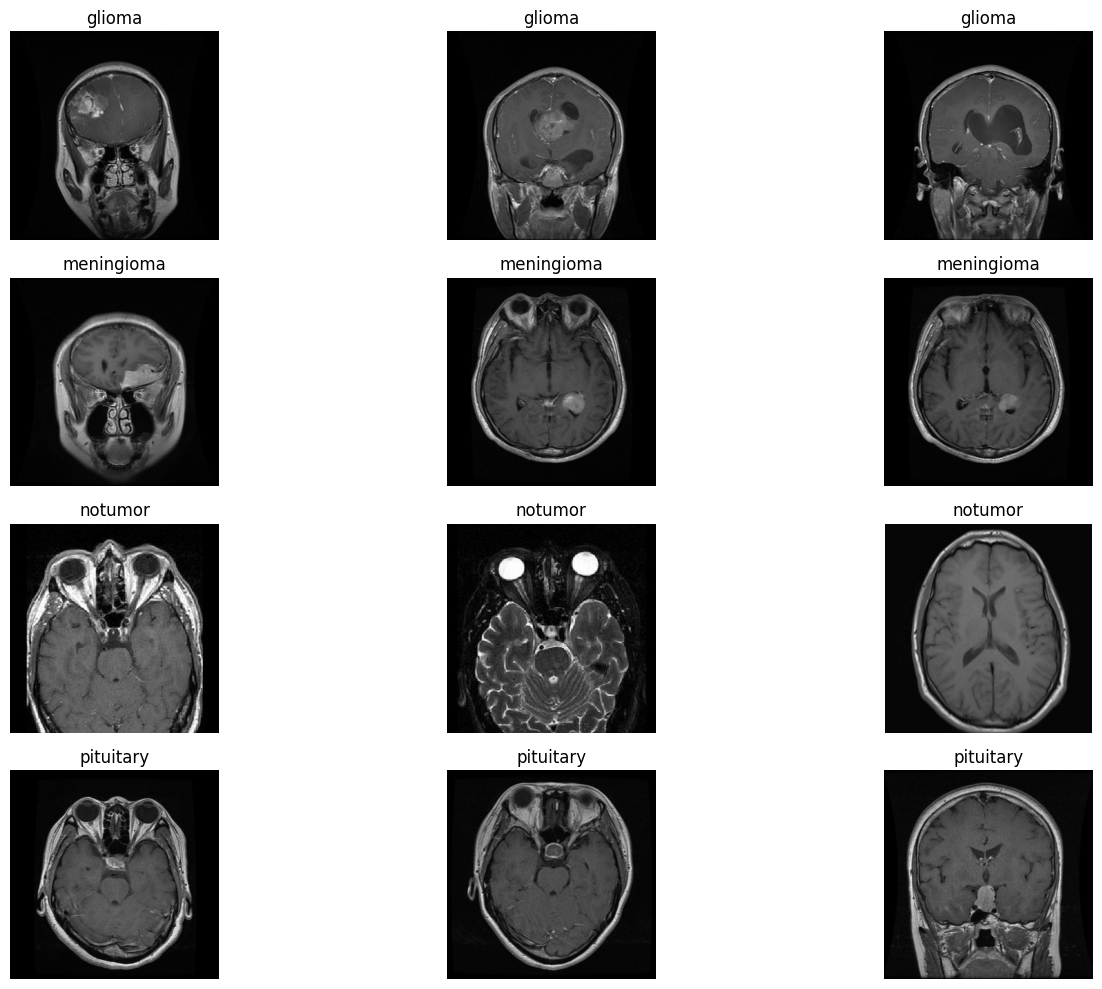

In [7]:
# Visualizar imágenes
def plot_sample_images(base_path, subfolder, classes, n_samples=3):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(classes):
        path = os.path.join(base_path, subfolder, class_name)
        if not os.path.exists(path):
            print(f"! Carpeta no encontrada: {path}")
            continue
            
        images = os.listdir(path)
        for j in range(min(n_samples, len(images))):  # Evita error si hay menos imágenes que n_samples
            img_path = os.path.join(path, images[j])
            img = cv2.imread(img_path)
            if img is None:
                print(f"! No se pudo leer la imagen: {img_path}")
                continue
                
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), n_samples, i * n_samples + j + 1)
            plt.imshow(img)
            plt.title(f'{class_name}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(base_path, 'Training', classes)

In [8]:
# Análisis de Dimensiones
def check_image_sizes(base_path, subfolder, classes, sample_size=20):
    sizes = []
    for class_name in classes:
        path = os.path.join(base_path, subfolder, class_name)
        images = os.listdir(path)[:sample_size]
        for img_name in images:
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            sizes.append(img.size)  # Ancho, Alto
    
    # Convertir a DataFrame
    df_sizes = pd.DataFrame(sizes, columns=['Width', 'Height'])
    print(df_sizes.describe())  # Estadísticas Descriptivas

check_image_sizes(base_path, 'Training', classes)

            Width      Height
count   80.000000   80.000000
mean   502.087500  503.662500
std     82.560173   83.275803
min    220.000000  198.000000
25%    512.000000  512.000000
50%    512.000000  512.000000
75%    512.000000  512.000000
max    630.000000  630.000000


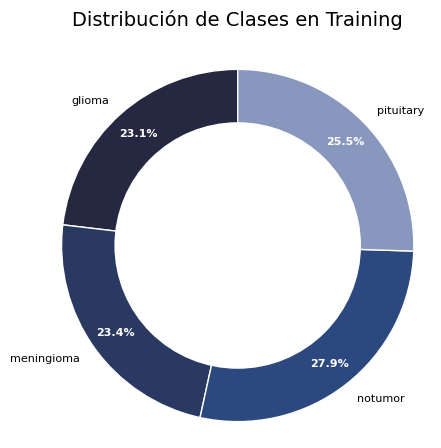

In [89]:
# Distribución con Pie Chart
colors = ['#262842', '#293961', '#2c497f', '#8897bd']
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    train_counts.values(),
    labels=train_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,          # Empieza desde arriba
    colors=colors,
    textprops={'fontsize': 8},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},  # Borde blanco
    pctdistance=0.85       # Alejar porcentajes del centro
)

plt.setp(autotexts, color='white', weight='bold')  # % en blanco y negrita
plt.title('Distribución de Clases en Training', fontsize=14, pad=20)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle) # Añadir círculo central para el estilo 'dona'
plt.axis('equal') # Círculo perfecto :{
plt.show()

# Identificar Problema

**Clasificación**

- Utiliza las categorías (ej. glioma, meningioma...)
- Busca predecir la etiqueta correcta
- Se evalúa con: Accuracy, Precision, Recall, F1-Score
- En mi caso, sería clasificar imágenes en una de las 4 categorías de tumores/no tumor


**Regresión**

- Utiliza valores numérico continuos (ej. tamaño del tumor, probabilidad...)
- Busca predecir una cantidad
- Se evalúa con: MSE, RMSE, R²
- Se podría tratar de predecir el tamaño o crecimiento de un tumor (pero como tengo puras img, no aplica mi dataset)

### Con respecto al Dataset...
Son imágenes etiquetadas en 4 clases: glioma, meningioma, notumor, pituitary. Cada una está en una carpeta etiquetada.
- Es un problema de clasificación supervisada multiclase (4 clases), ya que la salida es una etiqueta categórica, y no hay variables numéricas continuas para predecir

In [10]:
# Comprobar
etiquetas = ['glioma'] * 100 + ['meningioma'] * 100 + ['notumor'] * 100 + ['pituitary'] * 100 # Simulación de etiquetas
df = pd.DataFrame(etiquetas, columns=['Clase']) # Convertir a DataFrame

# Verificar tipo de problema
if df['Clase'].dtype == 'object':
    print("Es un problema de --Clasificación-- (etiquetas categóricas).")
    print("\nDistribución de clases:")
    print(df['Clase'].value_counts())
else:
    print("Es un problema de --Regresión-- (etiquetas numéricas).")

Es un problema de --Clasificación-- (etiquetas categóricas).

Distribución de clases:
Clase
glioma        100
meningioma    100
notumor       100
pituitary     100
Name: count, dtype: int64


# Creación de Propuestas de Modelos

Modelos supervisados a utilizar:

**Baseline**
- SVM + HOG/LBP: Para entender la separabilidad de clases
- Random Forest + Haralick: Ver importancia de features- es interpretable y rápido para prototipos

**Deep Learning**
- Red Neuronal Convolucional (CNN) desde Cero: Con arquitectura simple (2-3 capas Conv + MaxPooling)
   - Control total, buena base para aprender, pero requiere más datos y tiempo

*Otros...*
- KNN se podría usar como baseline, pero no puede usar raw img, a menos que se extraigan las características manualmente
- LDA como exploración: para visualizar cómo se separan las clases. Se asume distribución normal y covarianzas similares (pero sensible a outliers)

## SVM + HOG/LBP

In [11]:
# Preprocesamiento
from sklearn.model_selection import train_test_split

IMG_SIZE = (128, 128)  # Reducir tamaño para mayor velocidad
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Función para cargar imágenes
def load_images(base_path, subfolder, class_name, limit=100):  # Limitar muestras por clase
    path = os.path.join(base_path, subfolder, class_name)
    images = []
    for img_name in os.listdir(path)[:limit]:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
        img = cv2.resize(img, IMG_SIZE)  # Redimensionar
        images.append(img)
    return images

# Cargar datos (ej. con 100 img x clase)
X = []
y = []
for class_name in classes:
    images = load_images(base_path, 'Training', class_name, limit=100)
    X.extend(images)
    y.extend([class_name] * len(images))

# Convertir a arrays numpy
X = np.array(X)
y = np.array(y)

In [13]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/12.8 MB 2.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/12.8 MB 2.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/12.8 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.8 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.8 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/12.8 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.8 MB 2.5 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/12.8 MB 2.5 MB/s eta 0:00:04
   ---------------- ----------------------- 5.2/12.8 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.8 MB 2.5 MB/s eta 0:00:03
   -------------------- ------------------- 6.6/12.8 MB 2.5 MB/s eta 0:00:03
   ---

In [14]:
# Extracción de Features
## HOG (Histogram of Oriented Gradients)
from skimage.feature import hog

def extract_hog(images):
    hog_features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # HOG funciona en escala de grises
        features = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2))  # Parámetros reducidos
        hog_features.append(features)
    return np.array(hog_features)

X_hog = extract_hog(X)

In [15]:
## LBP (Local Binary Patterns):
from skimage.feature import local_binary_pattern

def extract_lbp(images):
    lbp_features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')  # Parámetros simples
        hist, _ = np.histogram(lbp, bins=256, range=(0, 256))
        lbp_features.append(hist)
    return np.array(lbp_features)

X_lbp = extract_lbp(X)

In [16]:
# Combinar Features
X_combined = np.concatenate([X_hog, X_lbp], axis=1)  # Unir HOG y LBP

In [17]:
# Entrenamiento del SVM (Configuración Ligera)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Codificar etiquetas (texto a número)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir datos (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42
)

# Crear pipeline: Escalar -> SVM
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1.0)  # Kernel lineal para mayor velocidad
)

model.fit(X_train, y_train) # Entrenar

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [18]:
# Evaluación (Métricas Básicas)
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test) # Predecir

# Reporte
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

      glioma       0.85      0.85      0.85        26
  meningioma       0.89      0.89      0.89        18
     notumor       0.88      0.78      0.82        18
   pituitary       0.90      1.00      0.95        18

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.87      0.88      0.87        80



In [20]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


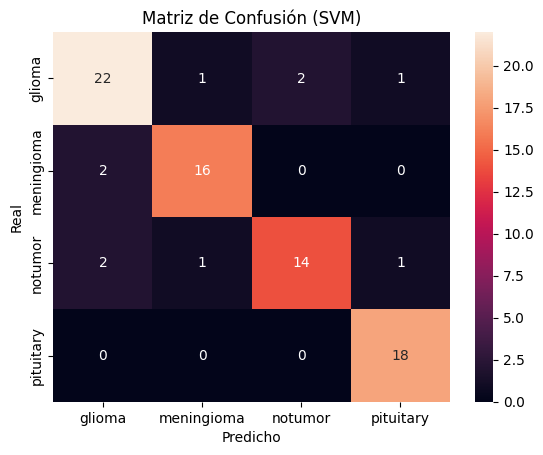

In [21]:
# Visualizar Resultados
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (SVM)')
plt.show()

## Random Forest + Haralick

In [22]:
# Extracción de Características
from skimage.feature import graycomatrix, graycoprops 

def extract_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Calcular matriz de co-ocurrencia (distancia=1, ángulos 0°, 45°, 90°, 135°)
    glcm = graycomatrix(gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    
    # Extraer 4 características (de 13 posibles) para eficiencia
    features = []
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy']:
        features.extend(graycoprops(glcm, prop)[0])
    
    return np.array(features)

# Contrast: Detecta bordes y variaciones bruscas. Dissimilarity es similar, pero menos sensible al ruido
# Homogeneity: Mide uniformidad textural
# Energy: Captura patrones repetitivos

# Aplicar a todas las imágenes
X_haralick = np.array([extract_haralick(img) for img in X]) 

In [23]:
# Entrenamiento de Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Mismos labels (y) que en SVM
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_haralick, y_encoded, test_size=0.2, random_state=42
)

# Modelo con parámetros para velocidad
model_rf = RandomForestClassifier(
    n_estimators=100,  # No. de árboles
    max_depth=10,      # Profundidad máxima (controlar overfitting)
    random_state=42,
    n_jobs=-1          # Usar todos los núcleos del CPU
)

model_rf.fit(X_train_h, y_train_h)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [24]:
# Métricas de Clasificación
from sklearn.metrics import classification_report

y_pred_rf = model_rf.predict(X_test_h)
print("Accuracy:", accuracy_score(y_test_h, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test_h, y_pred_rf, target_names=classes))

Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

      glioma       0.88      0.85      0.86        26
  meningioma       0.86      1.00      0.92        18
     notumor       0.87      0.72      0.79        18
   pituitary       0.84      0.89      0.86        18

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



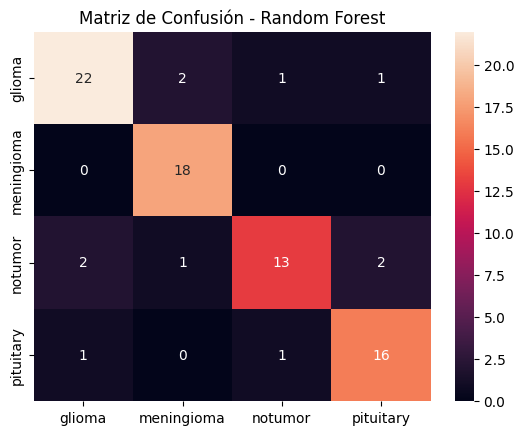

In [25]:
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_h, y_pred_rf), 
            annot=True, fmt='d', 
            xticklabels=classes, 
            yticklabels=classes)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

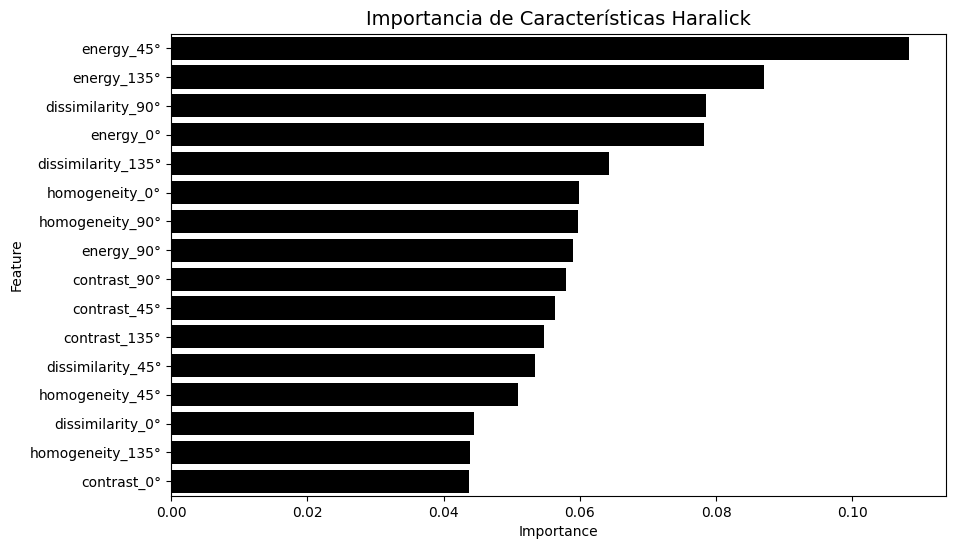

In [93]:
# Interpretabilidad-> Visualizar importancia de características Haralick

# Características (4 props * 4 ángulos)
feature_names = [f"{prop}_{angle}°" 
                 for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy'] 
                 for angle in [0, 45, 90, 135]]

# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df,
    color='#000000',  # Mismo color para todas las barras
    saturation=0.7     # Intensidad del color
)
plt.title('Importancia de Características Haralick', fontsize=14)
plt.show()

## Red Neuronal Convolucional (CNN) desde Cero

In [60]:
# Preprocesamiento
# Dividir datos y normalizar (usando el mismo X y y que en SVM/RF):
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Redimensionar imágenes y normalizar
X_cnn = np.array([cv2.resize(img, (128, 128)) for img in X])  # Tamaño 128x128
X_cnn = X_cnn / 255.0  # Normalizar píxeles [0, 1]

# Codificar etiquetas one-hot
y_cnn = to_categorical(y_encoded)  # y_encoded se usó en RF/SVM
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42) # Split train/test (80/20)

In [61]:
# Arquitectura CNN Ligera (2-3 Capas)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Capas Conv2D extraen features locales
    MaxPooling2D((2, 2)), # Reduce dimensionalidad, preservando patrones relevantes
    
    # Bloque 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Bloque 3 (Opcional - Añadir si la compu lo soporta)
    # Conv2D(128, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    
    # Clasificador
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para evitar overfitting, apaga 50% de neuronas aleatoriamente en entrenamiento para generalizar mejor
    Dense(4, activation='softmax')  # 4 clases
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\clau\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Entrenamiento Eficiente
# Data Augmentation (solo en entrenamiento)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,      # Rotación aleatoria
    width_shift_range=0.1,  # Desplazamiento horizontal
    zoom_range=0.2,         # Zoom aleatorio
    horizontal_flip=True    # Volteo horizontal
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=20)

In [63]:
# Entrenar con Early Stopping (para evitar overfitting):
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Patience=3 detiene el entrenamiento si no mejora en 3 épocas

history = model.fit(
    train_generator,
    epochs=15,  # Máximo de épocas (puede detenerse antes)
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

C:\Users\clau\anaconda3\envs\tfenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.2962 - loss: 1.3905 - val_accuracy: 0.5875 - val_loss: 1.0806
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.4592 - loss: 1.1896 - val_accuracy: 0.6250 - val_loss: 0.9114
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.5170 - loss: 1.0895 - val_accuracy: 0.6125 - val_loss: 0.8382
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.5707 - loss: 1.0278 - val_accuracy: 0.6500 - val_loss: 0.8413
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.5773 - loss: 0.9383 - val_accuracy: 0.7250 - val_loss: 0.6944
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.6323 - loss: 0.8789 - val_accuracy: 0.4750 - val_loss: 1.0892
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.5864 - loss: 0.9084 - val_accuracy: 0.7500 - val_loss: 0.6737
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.6889 - loss: 0.7490 - val_accuracy: 0.

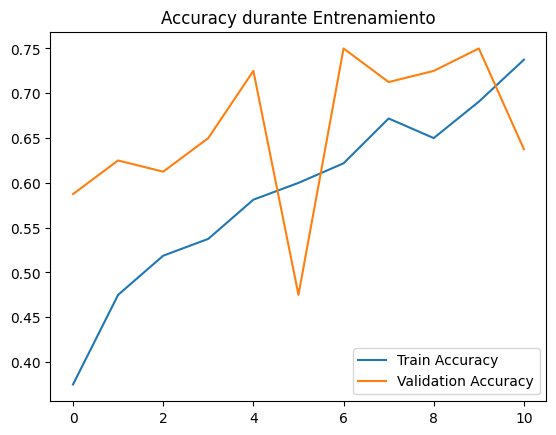

In [64]:
# Gráficas de Precisión y Pérdida
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante Entrenamiento')
plt.legend()
plt.show()

In [65]:
# Accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en Test: {accuracy*100:.2f}%")

Accuracy en Test: 71.25%


In [68]:
# Métricas completas
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir las clases para el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases (0-3)
y_true_classes = np.argmax(y_test, axis=1)   # Convertir one-hot a clases

# Calcular métricas
print("\n" + "═"*50)
print("MÉTRICAS COMPLETAS PARA CNN")
print("═"*50)

# Reporte de clasificación (incluye precision, recall, f1 por clase)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 

══════════════════════════════════════════════════
MÉTRICAS COMPLETAS PARA CNN
══════════════════════════════════════════════════
              precision    recall  f1-score   support

      glioma       0.88      0.54      0.67        26
  meningioma       0.55      0.89      0.68        18
     notumor       0.68      0.83      0.75        18
   pituitary       0.92      0.67      0.77        18

    accuracy                           0.71        80
   macro avg       0.76      0.73      0.72        80
weighted avg       0.77      0.71      0.71        80



In [69]:
# Métricas globales (weighted avg)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")  # Ya lo calculaste en tu código
print(f"Precisión (weighted avg): {precision:.4f}")
print(f"Recall (weighted avg): {recall:.4f}")
print(f"F1-Score (weighted avg): {f1:.4f}")


Accuracy: 0.7125
Precisión (weighted avg): 0.7696
Recall (weighted avg): 0.7125
F1-Score (weighted avg): 0.7128


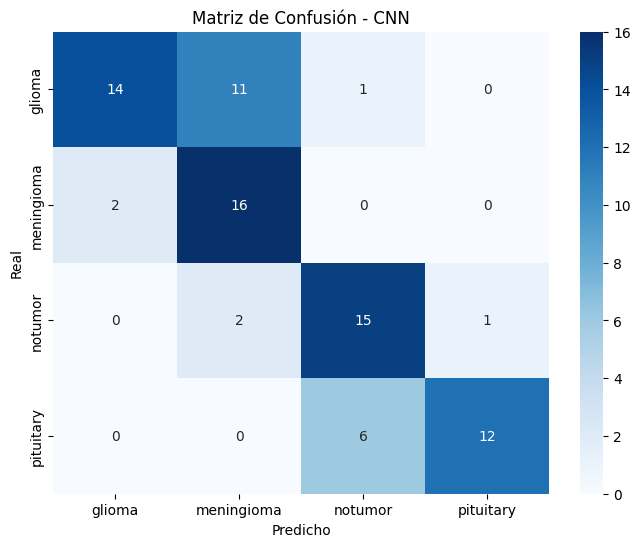

In [70]:
# 3. Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - CNN')
plt.show()

# Análisis de Resultados

**De forma general:**
- Accuracy: SVM (87.5%), Random Forest (86.2%), CNN (71.0%)
- Precisión: SVM (0.87), Random Forest (0.86), CNN (0.77)
- Recall: SVM (0.88), Random Forest (0.86), CNN (0.71)
- F1: SVM (0.87), Random Forest (0.86), CNN (0.71)

SVM es el mejor modelo en accuracy y F1, CNN tuvo el menor rendimiento (probablemente por over/underfitting en los parámetros).


**Por cada clase:** (revisando el F1)
- **Glioma**: SVM
- **Meningioma**: Random Forest
- **No Tumor**: SVM
- **Pituitary**: SVM

CNN tiene recall bajo (falla en detectar casos reales) en Glioma, alto recall en Meningioma (falsos positivos), y F1 bajos en No Tumor y Pituitaria.


Por lo tanto, SVM es el mejor modelo: Mayor accuracy (87.5%) y F1-score balanceado (0.87).

# Interpretabilidad de los Resultados

### SVM
Se puede visualizar cómo separa las clases en el espacio de características (utilizando PCA para reducir a 2D/3D). Las muestras críticas que definen el margen son identificables. Sin embargo, con kernels no lineales (ej. rbf), la interpretación se complica, además no proporciona importancia de features directamente.

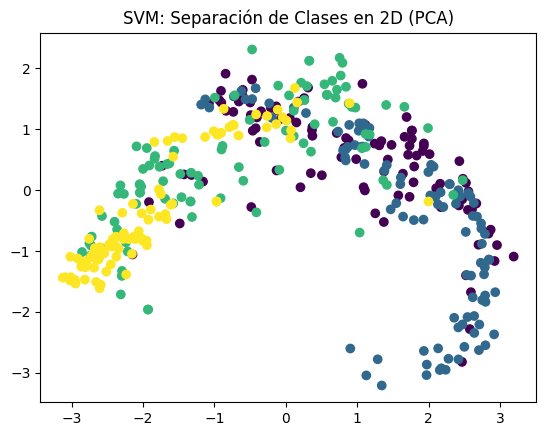

In [72]:
## Ej. Práctico
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir HOG a 2D y graficar vectores soporte
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_hog)  # X_hog: features extraídas para SVM

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis')
plt.title("SVM: Separación de Clases en 2D (PCA)")
plt.show()

### Random Forest
Muestra qué características Haralick/LBP son más relevantes. Y con los árboles de decisión, se puede visualizar uno individual para entender reglas simples.

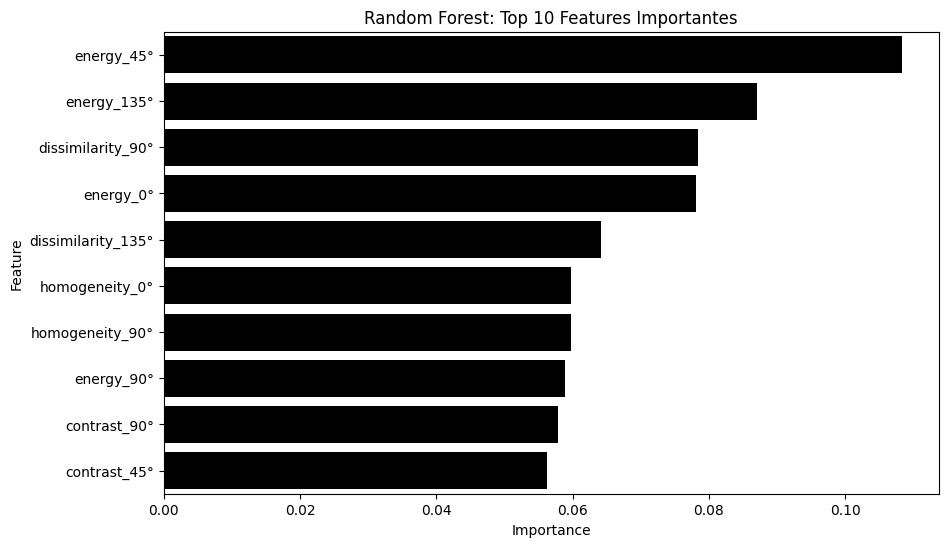

In [96]:
# Ej. Importancia de Features
import pandas as pd

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'Feature': feature_names,  
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance.head(10),
    color='#000000',  
    saturation=0.5    
)
plt.title("Random Forest: Top 10 Features Importantes")
plt.show()

### CNN
Puede ser más complicado interpretarlas porque las decisiones se basan en patrones aprendidos en capas ocultas (como un black box). Se pueden ocupar mapas de activación para ver qué regiones de la imagen activan ciertos filtros.

Random Forest tiene el mayor nivel de interpretabilidad. Como se están analizando imágenes de tumores cerebrales, se pueden combinar todos los métodos para obtener mejores resultados y posible validación clínica: Random Forest para la importancia de features, SVM para los márgenes de decisión y CNN con mapas de activación como ejemplos visuales (como es más complicado de interpretar sería para refinamiento posterior).